# Module 6 Exercise

**In these exercises, you will create map visualizations using ggmap and ggplot2.** 


Let's start with a simple data set first; number of visitors to United Stated from 2006 to 2015. 

In [1]:
# First, read the data and make sure the first column is character and the rest is numeric
vis <- read.csv("/dsa/data/all_datasets/spatial/US_visitors.csv",colClasses=c("character",rep("numeric",10)))

head(vis)

Region,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,394163,426922,474160,452693,485110,508489,573184,645919,757181,792026
Asia,8371244,8781480,8795236,7820986,9404375,10027386,11062760,12230911,13307053,14025173
Europe,12792122,13993051,15931641,14559083,14692093,15481558,15710015,16167460,17376449,17340542
North America,8491307,9963858,9832557,8963282,16449861,20940354,19996738,24561055,35589531,36312759
Oceania,1039872,1067258,1127444,1065909,1290993,1513963,1618337,1770569,1822066,1859507
South America,2432010,2763355,3039883,3075013,3587883,4126385,4651162,5511558,6052610,6256760


**We will create a flow map to visualize number of visitors from different continents.** 

**For that, we'll need coordinates**. `ggmap` library has functions to look up for **geocodes** of locations; these locations can be addresses, city names, or even continent names. 


Let's lookup continents' coordinates information by using `mutate_geocode` function that will augment our data frame with the coordinates (longitude, latitude).

In [2]:
library(ggplot2)
library(ggmap)

apikey <- scan("/dsa/data/all_datasets/ggmap_api_key.txt", what="character")
register_google(key = apikey)

# get geo COORDINATES for the place names and put them in the Region attribute 
vis <- mutate_geocode(vis, Region)
head(vis)
# get the map 
world <- map_data("world")

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Africa&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Asia&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Europe&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=North+America&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Oceania&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=South+America&key=xxx


Region,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,lon,lat
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,394163,426922,474160,452693,485110,508489,573184,645919,757181,792026,34.50852,-8.783195
Asia,8371244,8781480,8795236,7820986,9404375,10027386,11062760,12230911,13307053,14025173,100.61966,34.047863
Europe,12792122,13993051,15931641,14559083,14692093,15481558,15710015,16167460,17376449,17340542,15.25512,54.525961
North America,8491307,9963858,9832557,8963282,16449861,20940354,19996738,24561055,35589531,36312759,-105.25512,54.525961
Oceania,1039872,1067258,1127444,1065909,1290993,1513963,1618337,1770569,1822066,1859507,140.01877,-22.735910
South America,2432010,2763355,3039883,3075013,3587883,4126385,4651162,5511558,6052610,6256760,-55.49148,-8.783195


In [3]:
# get coordinates for US 
us <- geocode("United States")

Source : https://maps.googleapis.com/maps/api/geocode/json?address=United+States&key=xxx


**Exercise 1:** **Create a flow map that shows the number of visitors from different continents to US in 2015**. 

Make sure **color channel encodes ```Region``` , and size channel encodes number of visitors in 2015** (```X2015``` attribute).

Warning message:
“Ignoring unknown aesthetics: x, y”

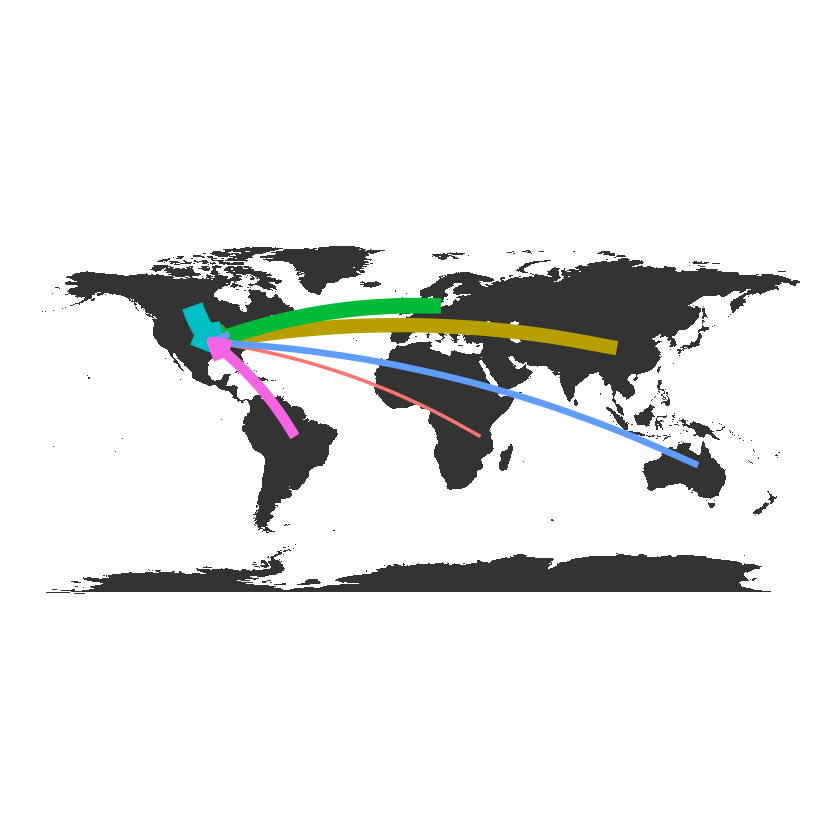

In [50]:
# Now first plot the world map 
ggplot() + 

geom_map(data=world, map=world, aes(long, lat, map_id=region)) +

# then plot the flow curves from continents to the same point in US. 

geom_curve(data=vis, aes(x=lon, y=lat, xend=us$lon, yend=us$lat, color=Region, size=X2015), 
           curvature=0.1, arrow=arrow(length=unit(0.05, "npc"))) +

# add coords themes etc. 
coord_equal() +

theme_void() + 

theme(legend.position="None")


**Exercise 2:** All flow curves end at the same point in US and get superposed. Instead of using a single endpoint, **let's use multiple endpoints of arrows in US** to make it look better. 

**Go to [latlong.net](http://www.latlong.net/) and choose good endpoints for each continent**, and then **add** their coordinates to your data frame as `ENDLON` and `ENDLAT` attributes and **redraw**. 

Region,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,lon,lat,ENDLON,ENDLAT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,394163,426922,474160,452693,485110,508489,573184,645919,757181,792026,34.50852,-8.783195,-100,34.00
Asia,8371244,8781480,8795236,7820986,9404375,10027386,11062760,12230911,13307053,14025173,100.61966,34.047863,-74,40.00
Europe,12792122,13993051,15931641,14559083,14692093,15481558,15710015,16167460,17376449,17340542,15.25512,54.525961,-93,45.00
North America,8491307,9963858,9832557,8963282,16449861,20940354,19996738,24561055,35589531,36312759,-105.25512,54.525961,-115,44.07
Oceania,1039872,1067258,1127444,1065909,1290993,1513963,1618337,1770569,1822066,1859507,140.01877,-22.735910,-85,35.00
South America,2432010,2763355,3039883,3075013,3587883,4126385,4651162,5511558,6052610,6256760,-55.49148,-8.783195,-118,34.00


Warning message:
“Ignoring unknown aesthetics: x, y”

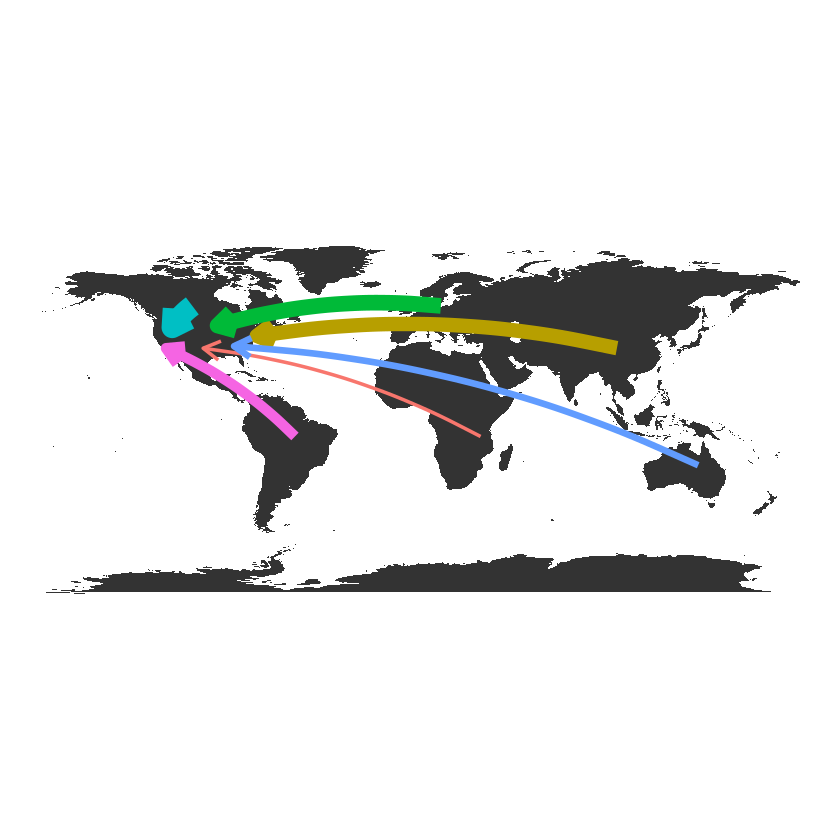

In [55]:
# Create a list of lon and lat with hardcoded coordinates in them.
# Make sure they are in the SAME order as the continents they correspond to.

ENDLON <- c(-100, -74, -93, -115, -85, -118)
ENDLAT <- c(34, 40, 45, 44.07, 35, 34)
vis2 <- cbind(vis, ENDLON, ENDLAT)
head(vis2)

ggplot() + 

geom_map(data=world, map=world, aes(long, lat, map_id=region)) +

# then plot the flow curves from continents to the same point in US. 

geom_curve(data=vis2, aes(x=lon, y=lat, xend=ENDLON, yend=ENDLAT, color=Region, size=X2015), 
           curvature=0.1, arrow=arrow(length=unit(0.05, "npc"))) +

# add coords themes etc. 
coord_equal() +

theme_void() + 

theme(legend.position="None")


---

**Now, we will work on the flight data from the L6_Projections_Practice. We will visualize flights. Let's get the data first.** 

In [91]:
library(dplyr)
library(sp)
library(geosphere)

# airport codes and coordinates 
airports <- read.csv("/dsa/data/all_datasets/spatial/airports.csv", as.is=TRUE, header=TRUE)
# flight destinations and counts 
flights <- read.csv("/dsa/data/all_datasets/spatial/flights.csv", as.is=TRUE, header=TRUE)

airports$lat <- as.numeric(airports$lat)
airports$long <- as.numeric(airports$long)

# get airport locations
airport_locs <- airports[, c("iata","long", "lat")]

# Link airport lat long to origin and destination
OD <- left_join(flights, airport_locs, by=c("airport1"="iata"))
OD <- left_join(OD, airport_locs, by=c("airport2"="iata"))
head(OD)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

airline,airport1,airport2,cnt,long.x,lat.x,long.y,lat.y
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
AA,DFW,SJU,120,-97.03720,32.89595,-66.00183,18.43942
AA,MSP,DFW,326,-93.21692,44.88055,-97.03720,32.89595
AA,LGA,ORD,860,-73.87261,40.77724,-87.90446,41.97960
AA,TPA,JFK,56,-82.53325,27.97547,-73.77893,40.63975
AA,STT,BOS,44,-64.97336,18.33731,-71.00518,42.36435
AA,PHX,DFW,550,-112.00806,33.43417,-97.03720,32.89595


**Exercise 3:** **Add another attribute** to the `OD` data frame that shows the **distance between two airports** and **visualize only those routes that are longer than 1500 miles**. 


In [94]:
# This is how we find the geodesic distance between two pairs of coordinates using geosphere library:

# Compute the geodesic distance between airports 
dd <- data.frame(Distance=distGeo(matrix(c(OD$long.x, OD$lat.x), ncol = 2), matrix(c(OD$long.y, OD$lat.y), ncol = 2)))

# convert meters to miles 
dd <- dd*0.000621371 

# Now ADD THIS to the OD data frame as another attribute and visualize only those routes that are longer than 1500 miles. 
head(dd)


OD2 <- cbind(OD, dd)
OD2 <- OD2[OD2$Distance > 1500,]

Distance
<dbl>
2165.0467
851.7060
733.2284
1005.0474
1692.8152
867.7657


Warning message:
“Ignoring unknown aesthetics: x, y”Warning message:
“Removed 10 rows containing missing values (geom_curve).”

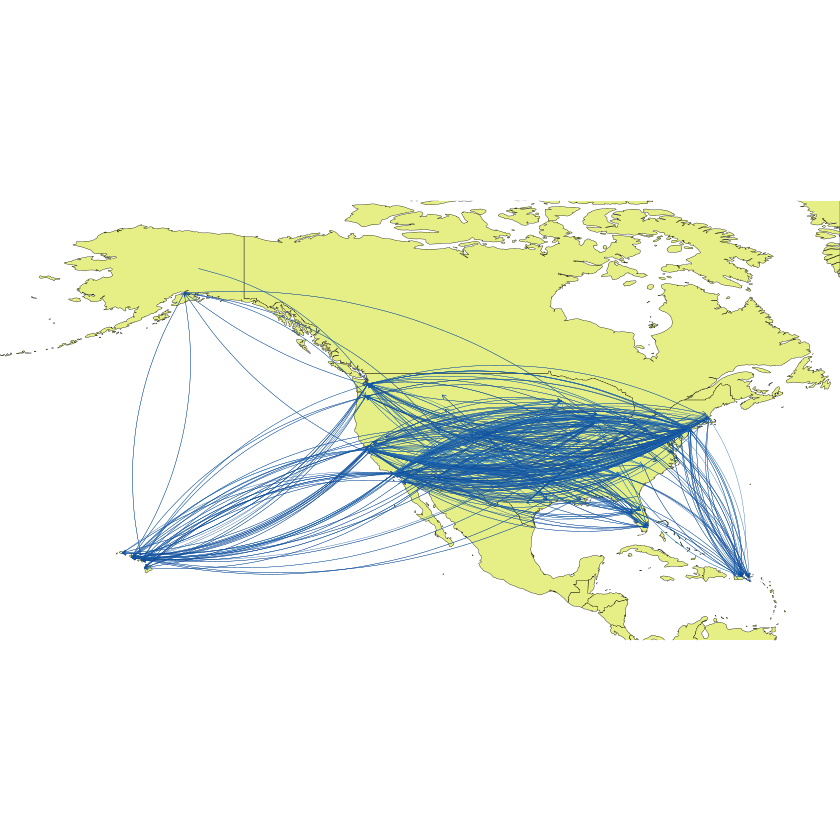

In [95]:
ggplot() + 

#geom_polygon(data=world, aes(long, lat, group=group), fill="#e6ef86", color="black", size=0.1) +

geom_map(data=world,map=world, aes(long, lat, map_id=region), fill="#e6ef86", color="black", size=0.1) +

geom_curve(data=OD2, aes(x=long.x, y=lat.x, xend=long.y, yend=lat.y, color=cnt), size=0.1,
                 curvature=-0.2, arrow=arrow(length=unit(0.01, "npc"))) +
    
scale_colour_distiller(palette="Blues", guide="none") +

coord_equal() +

xlim(c(-172,-57)) + ylim(c(12,72)) + 

theme_void()

**Exercise 4:** Let's read the Missouri County population data set and **create a choropleth map that shows the population in year 2000 county by county**. 

In [96]:
moco <- read.csv("/dsa/data/all_datasets/spatial/MO_2009_County.csv")

head(moco)

COUNTYNAME,COUNTYFIPS,COUNTYGNIS,POP_1990,POP_2000,ACRES,SQ_MILES,CNTY_SEAT
<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>
Clark,45,758477,7547,7416,327632.4,511.9257,Kahoka
Atchison,5,758457,7457,6430,351990.5,549.9852,Rock Port
Scotland,199,758552,4822,4983,280949.0,438.9828,Memphis
Schuyler,197,758551,4236,4170,197084.7,307.9449,Lancaster
Nodaway,147,758528,21709,21912,561734.1,877.7095,Maryville
Putnam,171,758540,5079,5223,332103.3,518.9114,Unionville


 **The folllowing code is for creating a `region` common id.**

In [97]:

# Get the Missouri counties map and rename the county column to "region"
mo_map <- map_data("county","missouri")
mo_map <- mo_map[ ,-5]
names(mo_map)[5] <- 'region'

# make the county names lowercase
moco <- mutate(moco, region = tolower(COUNTYNAME))
head(moco)

COUNTYNAME,COUNTYFIPS,COUNTYGNIS,POP_1990,POP_2000,ACRES,SQ_MILES,CNTY_SEAT,region
<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<chr>
Clark,45,758477,7547,7416,327632.4,511.9257,Kahoka,clark
Atchison,5,758457,7457,6430,351990.5,549.9852,Rock Port,atchison
Scotland,199,758552,4822,4983,280949.0,438.9828,Memphis,scotland
Schuyler,197,758551,4236,4170,197084.7,307.9449,Lancaster,schuyler
Nodaway,147,758528,21709,21912,561734.1,877.7095,Maryville,nodaway
Putnam,171,758540,5079,5223,332103.3,518.9114,Unionville,putnam


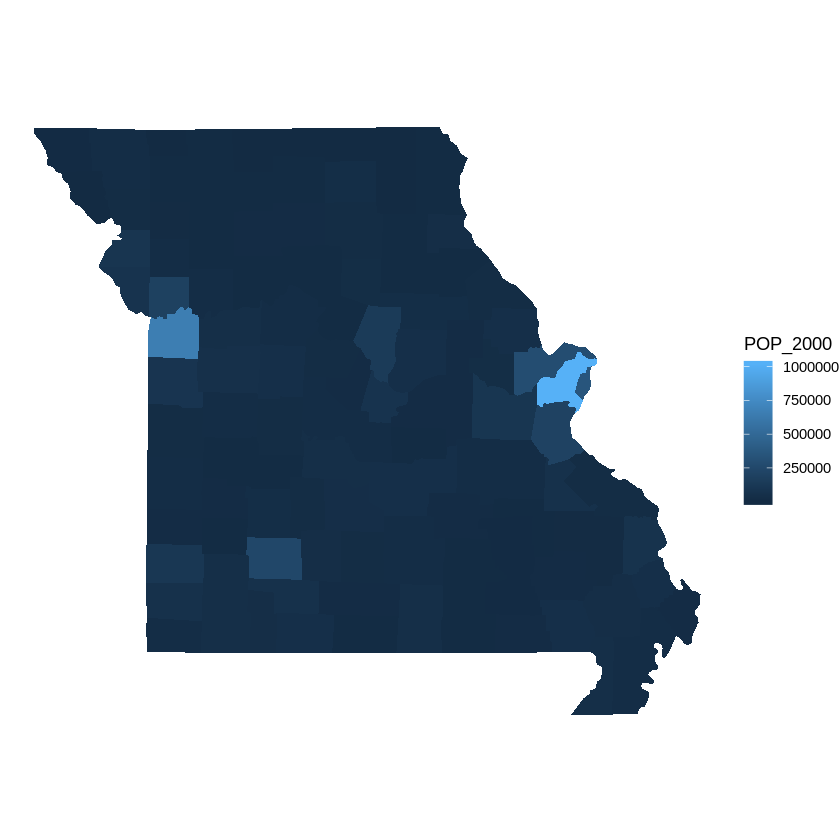

In [101]:

# Now define the filling attribute with your data frame 
ggplot(data=moco, aes(fill=POP_2000)) +

# and define your map with the common id 
geom_map(map=mo_map, aes(map_id=region))+

# mapping stuff
expand_limits(x = mo_map$long, y = mo_map$lat) +

coord_map() + 

theme_void()

**Exercise 5:** Let's read the Walmart store opening data, and **create a density map** out of it. 

Get a **Texas map from Google Maps**, then **create a density plot** and its **borders as layers** on the map. Finally **add store locations as another layer** encoded by **blue** dots. 

In [102]:
df <- read.csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')
head(df)

storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
<int>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>
1,7/1/62,3/1/97,1,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.34224,-94.07141,7,1,1962
2,8/1/64,3/1/96,1,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.23698,-93.09345,8,1,1964
4,8/1/65,3/1/02,1,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.17990,-94.50208,8,1,1965
8,10/1/67,3/1/93,1,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.15649,-92.75858,10,1,1967
7,10/1/67,,NA,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.81327,-92.30229,10,1,1967
10,7/1/68,3/1/98,1,40,21,2020 SOUTH MUSKOGEE,Tahlequah,OK,74464,Supercenter,35.92366,-94.97185,7,1,1968


In [104]:
# Get the Google Map tile at zoom level 7 for Fort Worth, Texas

TX <- suppressMessages(get_map("Fort Worth, Texas", zoom = 7))



# Create a map from it, slightly whiten it. 

TXmap <- ggmap(TX, extent = "device", darken = c(.2,"white"))

Warning message:
“Removed 2733 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 2733 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 2733 rows containing missing values (geom_point).”

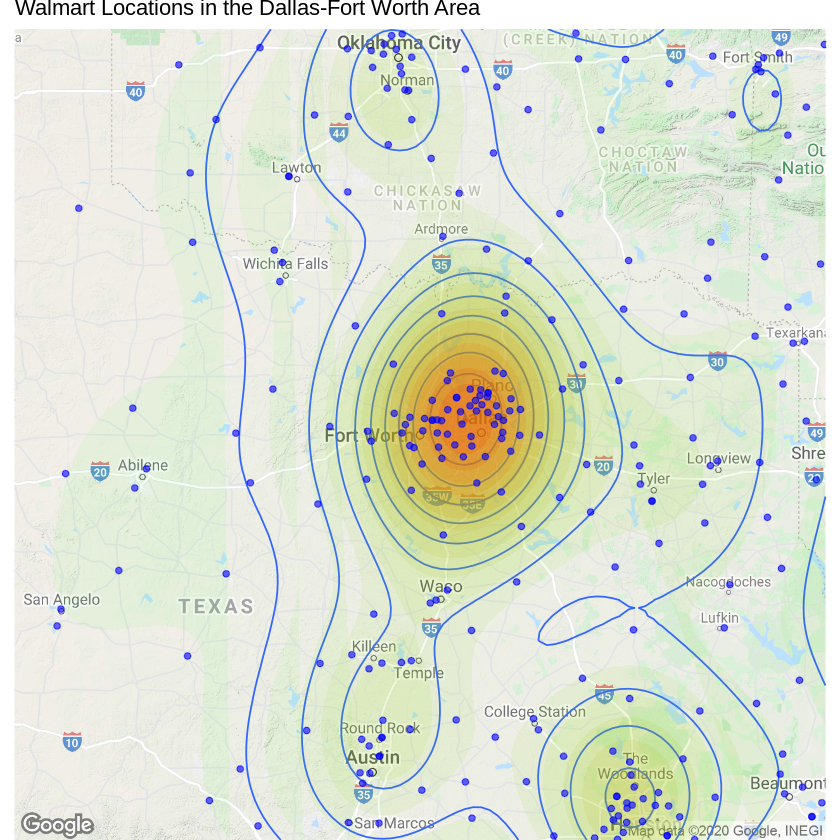

In [109]:
# Draw the map first 
TXmap +

# add levels 
geom_density2d(data = df, aes(x = LON, y = LAT)) + 

# add density heat map
stat_density2d(data = df, aes(x = LON, y = LAT, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 

# color scale 
scale_fill_gradient("Walmart\nLocation\nDensity", low = "green", high = "red") + 

scale_alpha(range = c(0.05, 0.2), guide = FALSE) +

# add store locations here so that they are on top 
geom_point(aes(x = LON, y = LAT), data = df, alpha=0.6, color = "blue") +

# remove the legend 
theme(legend.position = "none")+ 

# add title
ggtitle("Walmart Locations in the Dallas-Fort Worth Area")

**Exercise 6:** **Do the same exercise above** for **motor vehicle theft** data except the point layer. 

**Plot the densities of all data points for all years on the same map.** 

ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
<int>,<fct>,<fct>,<lgl>,<lgl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
8951354,12/31/2012 23:15,STREET,FALSE,FALSE,623,6,69,2012,41.75628,-87.62164
8951141,12/31/2012 22:00,STREET,FALSE,FALSE,1213,12,24,2012,41.89879,-87.66130
8952745,12/31/2012 22:00,RESIDENTIAL YARD (FRONT/BACK),FALSE,FALSE,1622,16,11,2012,41.96919,-87.76767
8952223,12/31/2012 22:00,STREET,FALSE,FALSE,724,7,67,2012,41.76933,-87.65773
8951608,12/31/2012 21:30,STREET,FALSE,FALSE,211,2,35,2012,41.83757,-87.62176
8950793,12/31/2012 20:30,STREET,TRUE,FALSE,2521,25,19,2012,41.92856,-87.75400


Warning message:
“Removed 13308 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 13308 rows containing non-finite values (stat_density2d).”

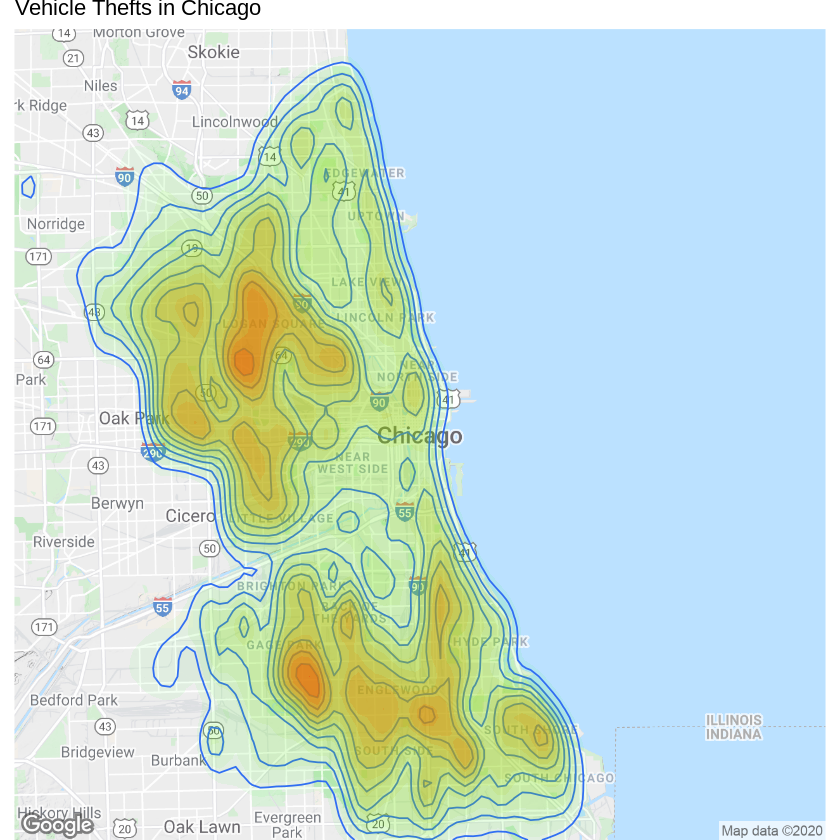

In [111]:
df <-read.csv("/dsa/data/all_datasets/motor_vehicle_thefts/mvt.csv")
head(df)

# Get the Google Map tile at zoom level 11 for Chicago

CHI <- suppressMessages(get_map("Chicago", zoom = 11))

# Create a map from it, slightly whiten it. 

CHImap <- ggmap(CHI, extent = "device", darken = c(.2,"white"))

# Draw the map first 
CHImap +

# add levels 
geom_density2d(data = df, aes(x = Longitude, y = Latitude)) + 

# add density heat map
stat_density2d(data = df, aes(x = Longitude, y = Latitude, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 

# color scale 
scale_fill_gradient("Vehicle\nTheft\nDensity", low = "green", high = "red") + 

scale_alpha(range = c(0.05, 0.2), guide = FALSE) +

# remove the legend 
theme(legend.position = "none") + 

# add title
ggtitle("Vehicle Thefts in Chicago")

**Exercise 7:** **Repeat** exercise 6 for **small multiples of years**. (hint: use the same ggplot object you createad above and add code for small multiples.) 

Warning message:
“Removed 13308 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 13308 rows containing non-finite values (stat_density2d).”

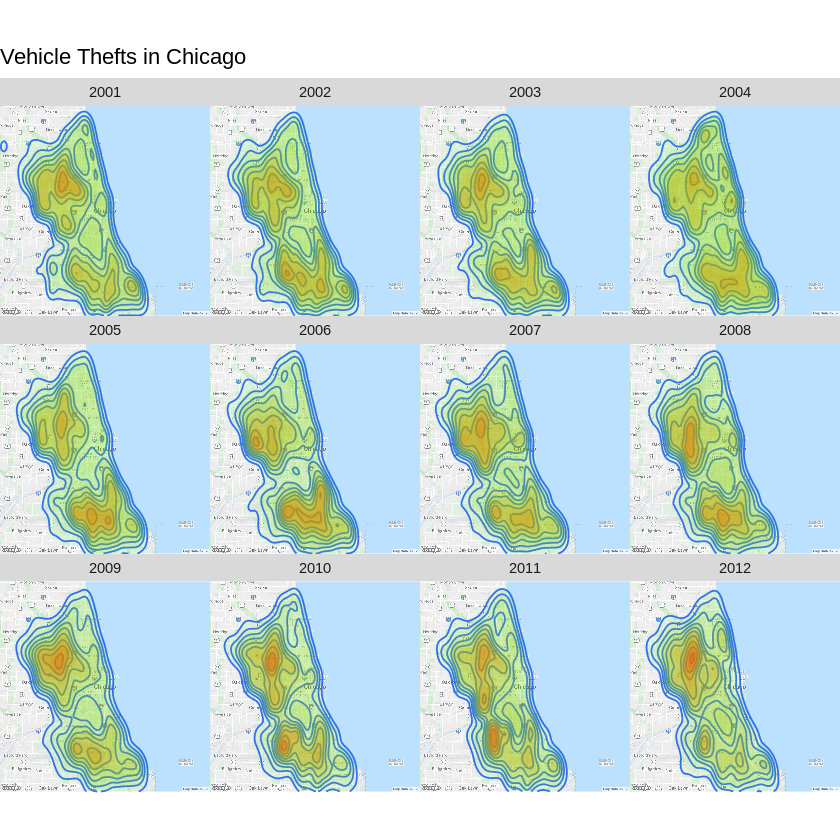

In [112]:
# Get the Google Map tile at zoom level 11 for Chicago

CHI <- suppressMessages(get_map("Chicago", zoom = 11))

# Create a map from it, slightly whiten it. 

CHImap <- ggmap(CHI, extent = "device", darken = c(.2,"white"))

# Draw the map first 
CHImap +

# add levels 
geom_density2d(data = df, aes(x = Longitude, y = Latitude)) + 

# add density heat map
stat_density2d(data = df, aes(x = Longitude, y = Latitude, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 

# color scale 
scale_fill_gradient("Vehicle\nTheft\nDensity", low = "green", high = "red") + 

scale_alpha(range = c(0.05, 0.2), guide = FALSE) +

# remove the legend 
theme(legend.position = "none") + 

# add title
ggtitle("Vehicle Thefts in Chicago") + 

facet_wrap(~Year)
